In [1]:
from music21 import * 

In [2]:
# this is what gets .show() to work
us = environment.UserSettings()
us['musicxmlPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'
us['musescoreDirectPNGPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'


In [3]:
# print list of all streams in the a score
o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x2598541f668>
<music21.stream.Score 0x2598552ac50>
<music21.stream.Score 0x259855d1e10>
<music21.stream.Score 0x25985690940>
<music21.stream.Score 0x259866bf908>


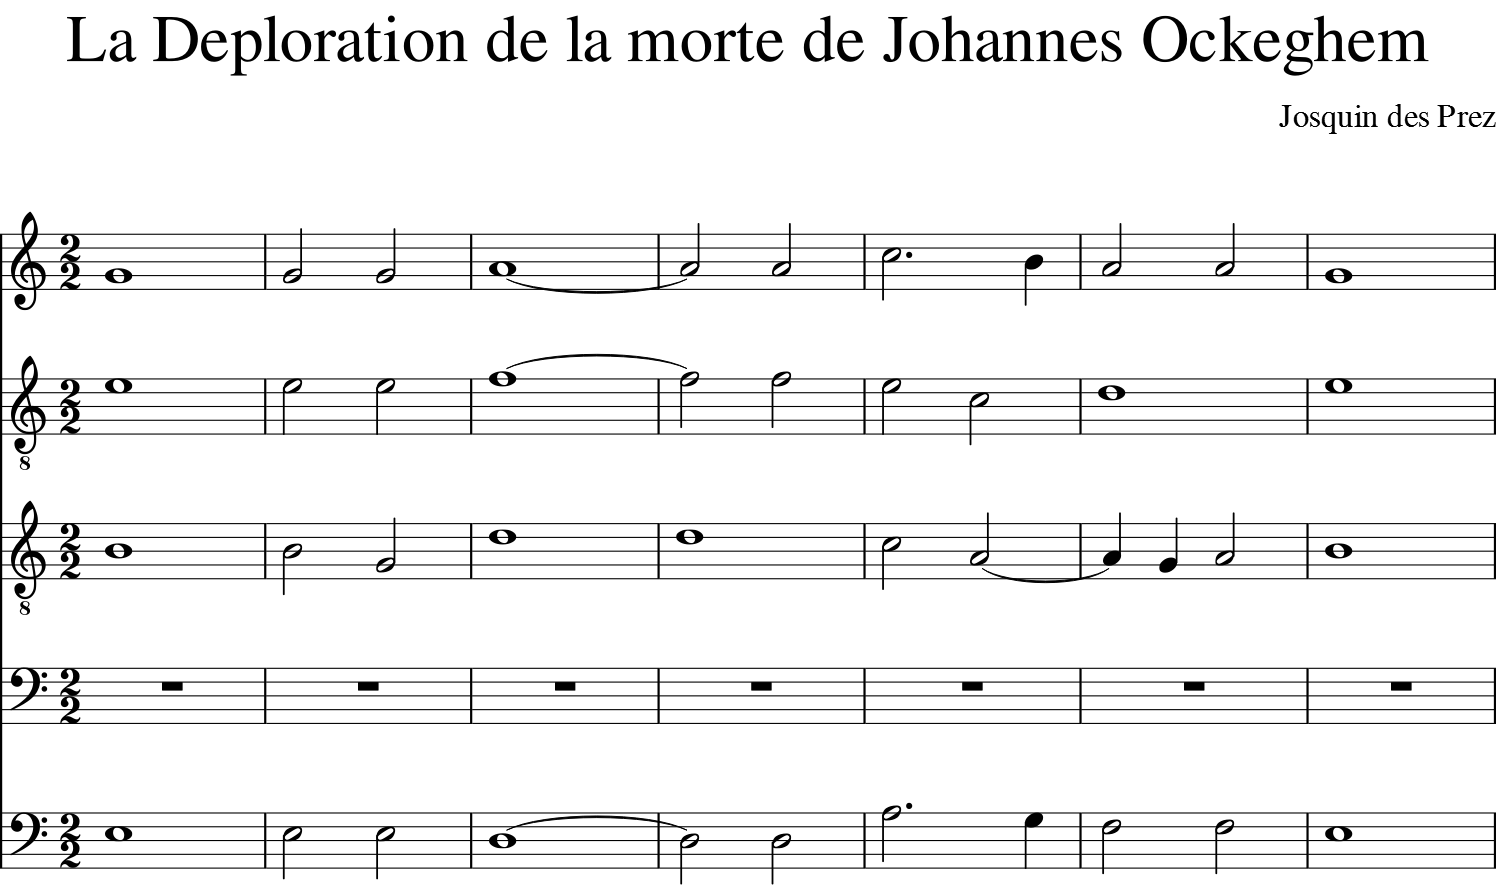

In [4]:
#merge all streams into one score
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

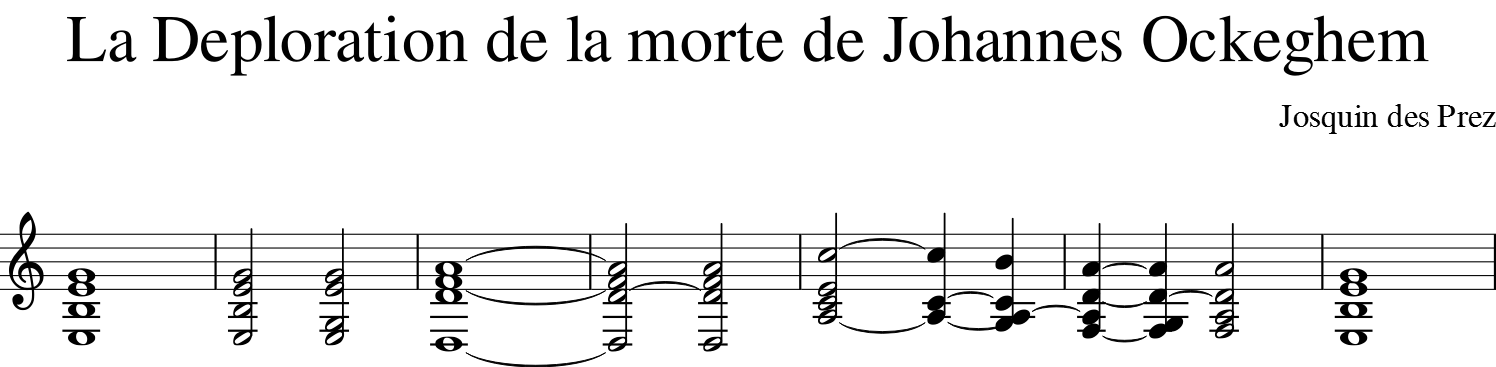

In [5]:
#chordify to make a reduction
reduction = scoreExcerpt.chordify()
reduction.show()

In [7]:
#add interval annotations
for c in reduction.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()

scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[4]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()

StreamException: the object (<music21.stream.Part 0x25986a2e390>, id()=2583534166928) is already found in this Stream (<music21.stream.Score 0x2598541f780>, id()=2583511037824)

In [8]:
s = corpus.parse('bwv66.6')

In [9]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

In [10]:
sFlat = sChords.flat
sFlat

sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

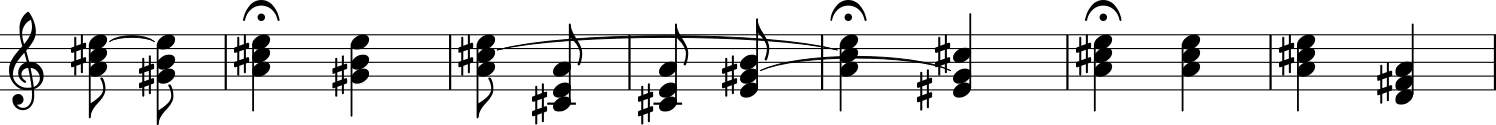

In [11]:
# Displays all chords in the piece that are considered triads or 7ths built on the key of A

def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)
        
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

displayPart.show()

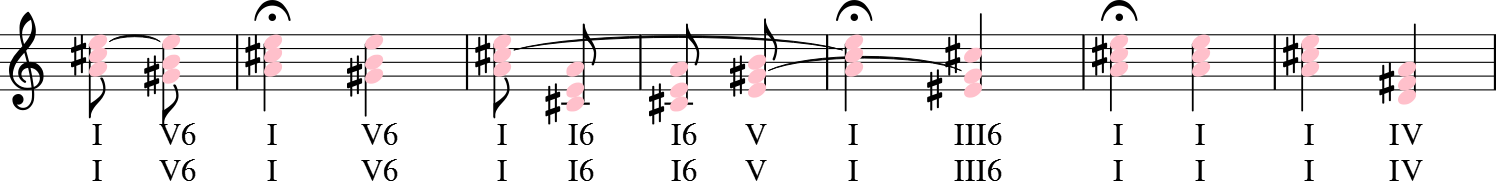

In [25]:
#now with roman numerals attached
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()


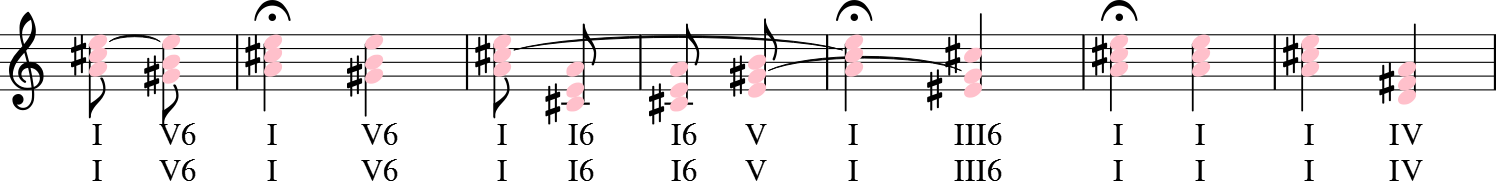

In [26]:
#color code all V6 chords
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'V6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

displayPart.show()